In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-image/CatImage.jpg


## What is OpenCV?
OpenCV is an open-source software library for computer vision and machine learning. The OpenCV full form is Open Source Computer Vision Library. It was created to provide a shared infrastructure for applications for computer vision and to speed up the use of machine perception in consumer products. OpenCV is an Image Processing library created by Intel and maintained by Willow Garage.

# Required Module Installation

In [2]:
!pip install imutils
!pip install opencv-python

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25861 sha256=a880e07f27e60c22d2c1129177791d959952e524e6a85f8dbb72922f69c9ff46
  Stored in directory: /root/.cache/pip/wheels/35/e4/69/cb99d996d14a2971b79b990d68b05a17d58ce530ff96090dfc
Successfully built imutils


# import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils

import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline


# Load & Read Data

## We load an image from the current folder with the function cv.imread and display it with the function cv2.

Images are made of pixels. They are the colored dots that compose an image. If you zoom into an image you can see squares of uniform color. Use the mouse wheel and try to zoom into an OpenCV image.

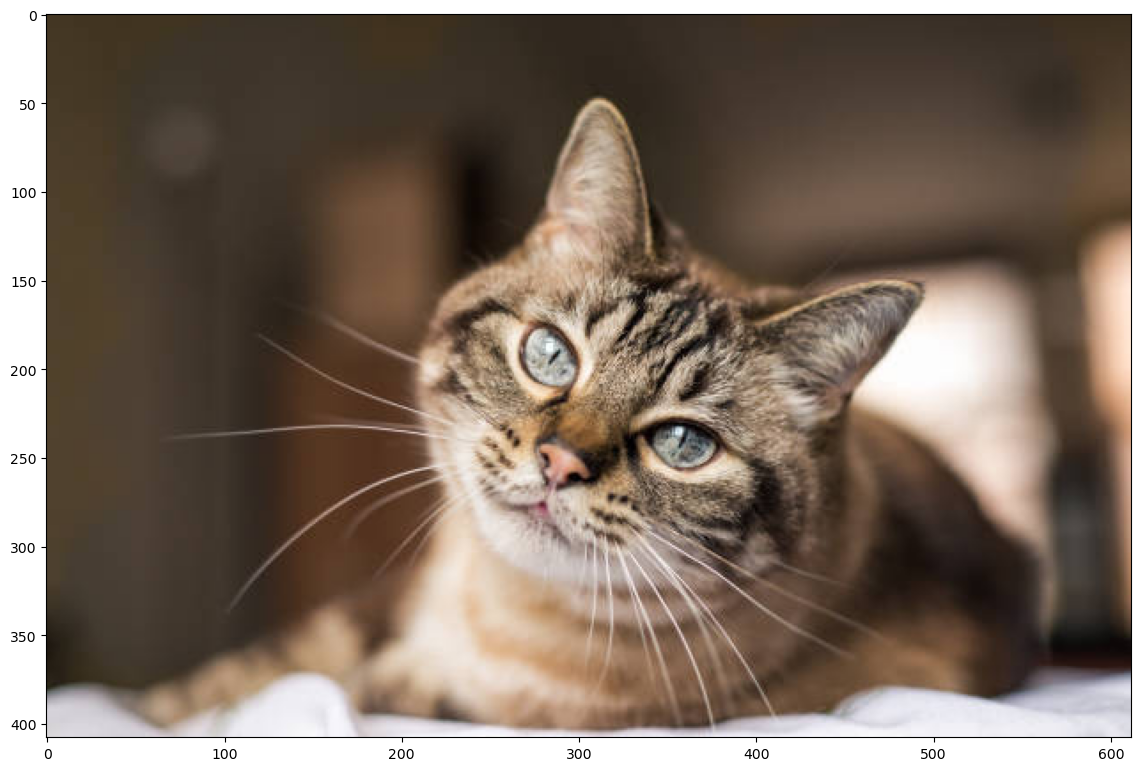

In [39]:
plt.figure(figsize = (14, 10)) 
imageData = plt.imread("../input/cat-image/CatImage.jpg") #input or read an image

plt.imshow(imageData) #show the image
plt.grid(False) ##it will give us the image in same as main image
#plt.grid(True) #it will give us the image in a grid format

plt.show() #to remove this text (<function matplotlib.pyplot.show(close=None, block=None)>
            #) we use show()


In [5]:
imageData.shape

(408, 612, 3)

# We will do above things in a function to make the code more readable & reusable

In [6]:
def catImageShow(imageTitle, image):
    if len(imageData.shape) == 3:
        imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Here we will convert the image to RGB format by using cvtColor()    
    
    #elif len(imageData.shape) == 1:
       # imageVariable = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #if the image is in gray
        
    plt.figure(figsize=(4, 2))
    plt.imshow( imageVariable )
    plt.title(imageTitle)
    plt.show()

Splitting Image

In [7]:
cv2.split(imageData) #Here as we convert it into RGB so the matrices sequences are R, G, B
                     # Splitting channel

(array([[ 67,  67,  67, ...,  60,  60,  60],
        [ 67,  67,  67, ...,  60,  60,  60],
        [ 67,  67,  67, ...,  61,  61,  61],
        ...,
        [215, 216, 216, ..., 221, 220, 218],
        [216, 216, 217, ..., 224, 222, 220],
        [216, 217, 217, ..., 226, 224, 222]], dtype=uint8),
 array([[ 54,  54,  54, ...,  47,  47,  47],
        [ 54,  54,  54, ...,  47,  47,  47],
        [ 54,  54,  54, ...,  48,  48,  48],
        ...,
        [213, 214, 214, ..., 221, 220, 218],
        [214, 214, 215, ..., 224, 222, 220],
        [214, 215, 215, ..., 226, 224, 222]], dtype=uint8),
 array([[ 35,  35,  35, ...,  31,  31,  31],
        [ 35,  35,  35, ...,  31,  31,  31],
        [ 35,  35,  35, ...,  32,  32,  32],
        ...,
        [216, 217, 217, ..., 229, 228, 226],
        [217, 217, 218, ..., 232, 230, 228],
        [217, 218, 218, ..., 234, 232, 230]], dtype=uint8))

In [8]:
cv2.split(imageData.shape[0]) #Splitting Height

(array([[408.],
        [  0.],
        [  0.],
        [  0.]]),)

In [9]:
cv2.split(imageData.shape[1]) #Splitting Width

(array([[612.],
        [  0.],
        [  0.],
        [  0.]]),)

# Image Histogram

**A histogram is a graphical representation of data. A histogram of an image represents how frequently various color values occur in the image or the distribution of pixel intensities in a colour or gray-scale image. The histogram plot shows the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in the X-axis and a corresponding number of pixels in the image on the Y-axis. It means the x-axis represents the different color values, which lie between 0 and 255, and the y-axis represents the number of times a particular intensity value occurs in the image.
Python OpenCV provides the cv2.calcHist() function to calculate the histogram of one or more arrays. We can use this function to calculate the histogram of both single channel images and multi-channel images. In this article, we have used a multi-channel image.**

In [10]:
def imageHistogram(image, imageTitle, mask = None):
    colorChannel = cv2.split(image)
    colorCombination = ('b','g','r') #we take this sequnces in randomely or order of representation
                                    # we make it as a tuple because it is immutable or we won't change it in whole notebook
    plt.figure(figsize = (4,2))
    plt.title(imageTitle)
    plt.xlabel("Bins")
    plt.ylabel("Pixel Information")
    
    for(colorChannel, colorCombination) in zip(colorChannel, colorCombination):
        histogram = cv2.calcHist([colorChannel], [0], mask, [256], [0, 256]) # [0] means each pixel's zero index value, [256] is highest value of pixels, [0,256] is range of x-axis
       
        plt.plot(histogram, color = colorCombination)
        plt.xlim([0, 256]) #as matplotlib has two limitation(xlim,ylim), we declare x limitation 
        plt.show()

We will use our histogram in our raw image

We use this to determine frequency of color

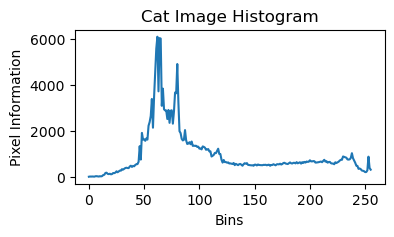

In [11]:
imageArgument = {"Image":"../input/cat-image/CatImage.jpg"}
image = cv2.imread(imageArgument["Image"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
sampleHistogram = cv2.calcHist([image], [0], None, [256], [0, 256]) #here [0] we can use only [0],[1],[2] values

plt.figure(figsize = (4, 2))
plt.title("Cat Image Histogram")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")
plt.plot(sampleHistogram) #read histogram 
plt.show()

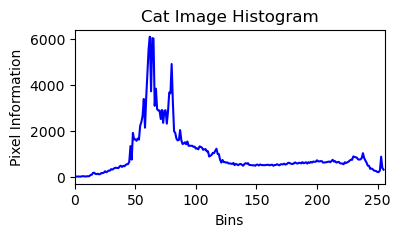

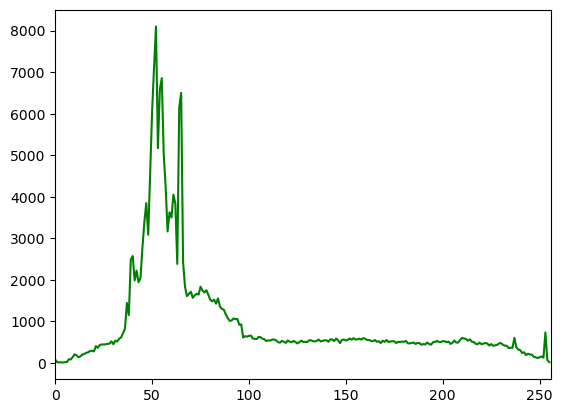

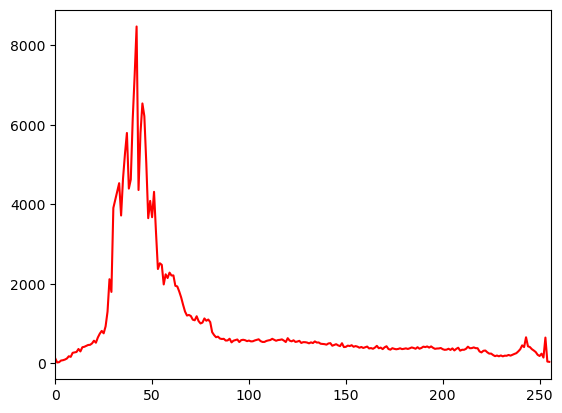

In [12]:
colorChannel = cv2.split(image)
colorCombination = ('b', 'g', 'r')
plt.figure(figsize = (4, 2))
plt.title("Cat Image Histogram")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")

for (colorChannel, colorCombination) in zip(colorChannel, colorCombination):
    histogram = cv2.calcHist([colorChannel], [0], None, [256], [0, 256])
    plt.plot(histogram, color = colorCombination)
    plt.xlim([0, 256])
    plt.show()

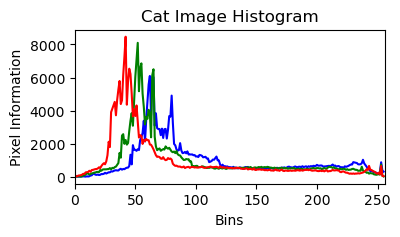

In [13]:
colorChannel = cv2.split(image)
colorCombination = ('b', 'g', 'r')
plt.figure(figsize = (4, 2))
plt.title("Cat Image Histogram")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")

for (colorChannel, colorCombination) in zip(colorChannel, colorCombination):
    histogram = cv2.calcHist([colorChannel], [0], None, [256], [0, 256])
    plt.plot(histogram, color = colorCombination)
    plt.xlim([0, 256])
    #plt.show()

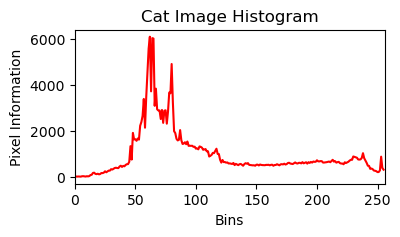

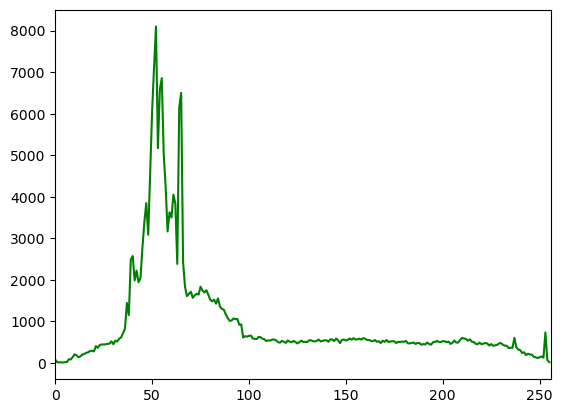

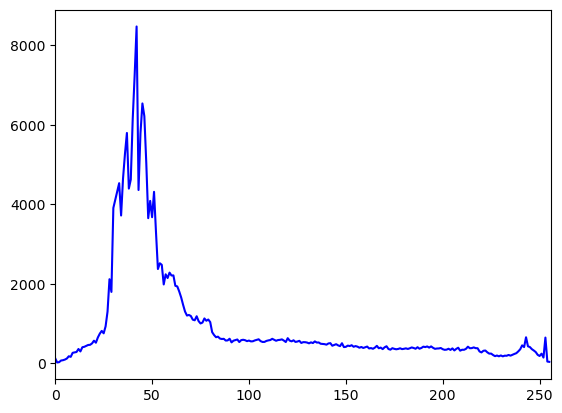

In [14]:
colorChannel = cv2.split(image)
colorCombination = ('r', 'g', 'b')
plt.figure(figsize = (4, 2))
plt.title("Cat Image Histogram")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")

for (colorChannel, colorCombination) in zip(colorChannel, colorCombination):
    histogram = cv2.calcHist([colorChannel], [0], None, [256], [0, 256])
    plt.plot(histogram, color = colorCombination)
    plt.xlim([0, 256])
    plt.show()

We wil make axes of canvas

Image Shape: (32, 32) with 1024


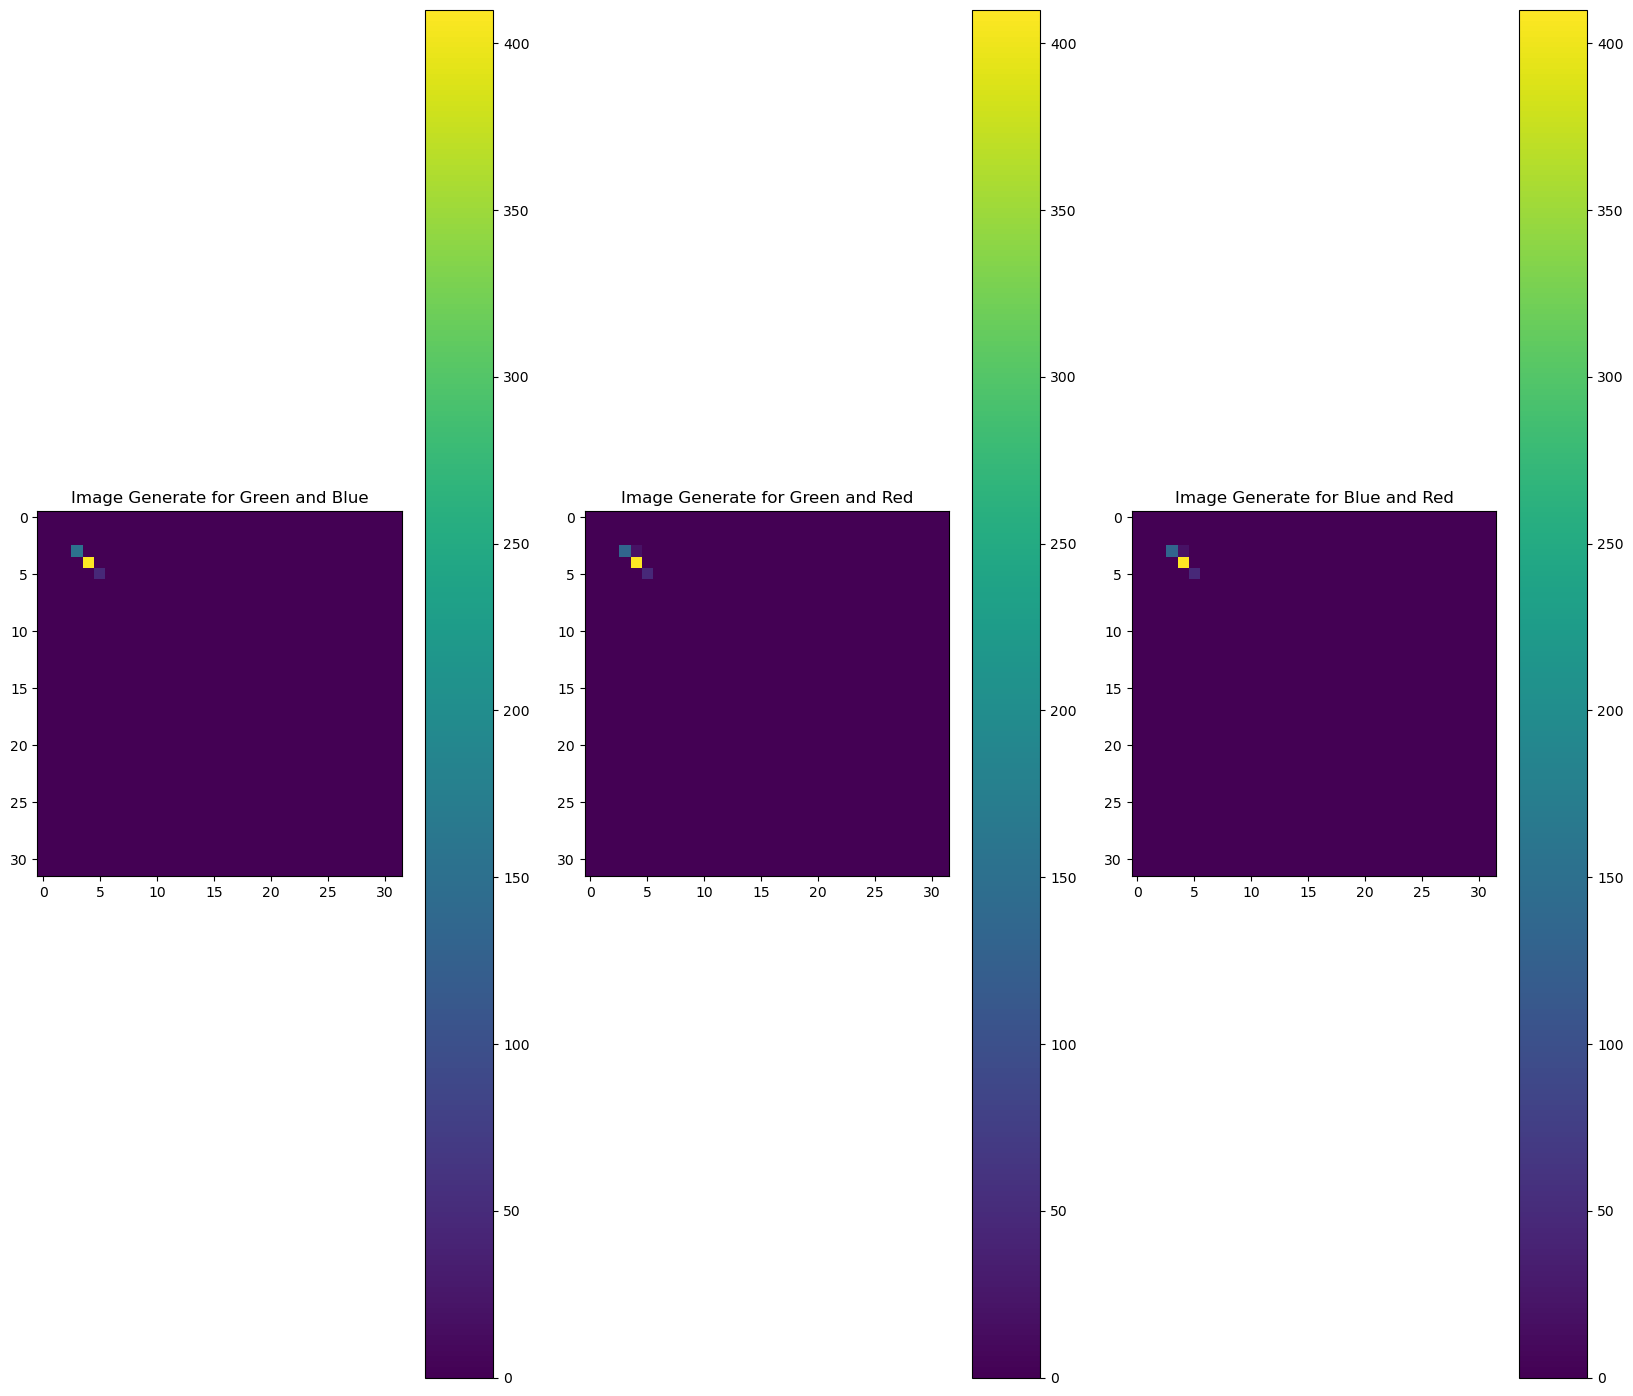

In [15]:
color = ["B", "G", "R"]
figure = plt.figure(figsize = (20,18))

axes = figure.add_subplot(131)#1 = row, 3 = column, 1 = column_index
histogram = cv2.calcHist([colorChannel[1], colorChannel[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
plot = axes.imshow(histogram, interpolation = "nearest")#interpolation means correlation of objects
axes.set_title("Image Generate for Green and Blue")
plt.colorbar(plot)


axes = figure.add_subplot(132)
histogram = cv2.calcHist([colorChannel[1], colorChannel[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
plot = axes.imshow(histogram, interpolation = "nearest")#interpolation means correlation of objects
axes.set_title("Image Generate for Green and Red")
plt.colorbar(plot)


axes = figure.add_subplot(133)
histogram = cv2.calcHist([colorChannel[0], colorChannel[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
plot = axes.imshow(histogram, interpolation = "nearest")#interpolation means correlation of objects
axes.set_title("Image Generate for Blue and Red")
plt.colorbar(plot)


print("Image Shape: {} with {}".format(histogram.shape, histogram.flatten().shape[0]))

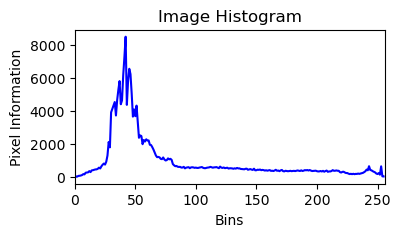

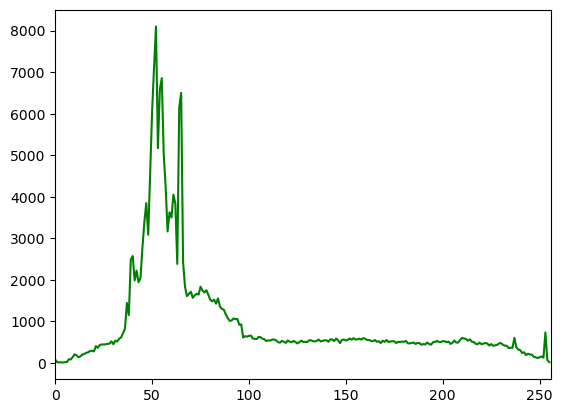

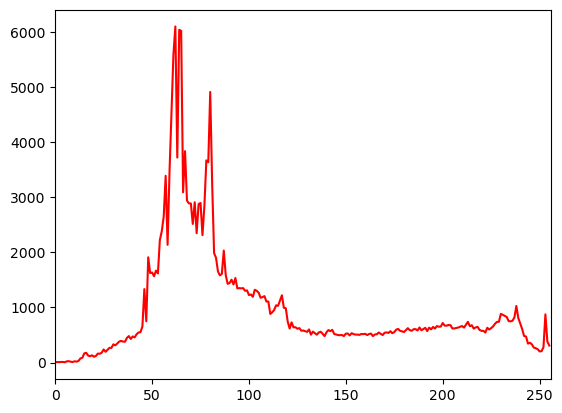

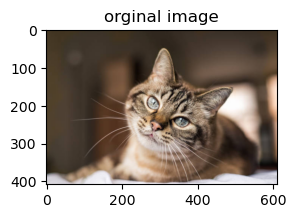

In [16]:
image = cv2.imread("../input/cat-image/CatImage.jpg")
imageHistogram(image, "Image Histogram")
catImageShow("orginal image", image)

In [23]:
def catImageShow(imageTitle, image):
    imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Here we will convert the image to RGB format by using cvtColor()      
    plt.figure(figsize=(4, 2))
    plt.imshow( imageVariable )
    plt.title(imageTitle)
    plt.show()

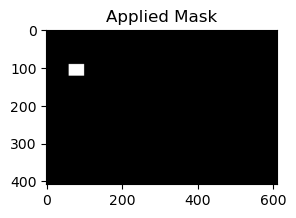

In [24]:
imageMask = np.zeros(imageData.shape[:2], dtype= "uint8")
cv2.rectangle(imageMask, (60, 90), (100, 120), 255, -1)
catImageShow("Applied Mask", imageMask)

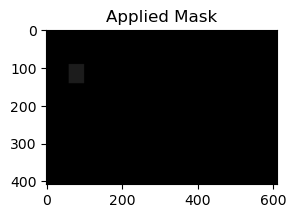

In [27]:
imageMask = np.zeros(imageData.shape[:2], dtype = "uint8")
cv2.rectangle(imageMask, (60,90), (100, 140), 28, -1)
catImageShow("Applied Mask", imageMask)

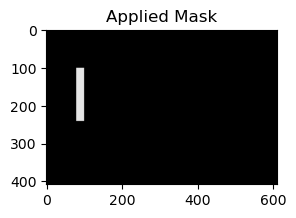

In [29]:
imageMask = np.zeros(imageData.shape[:2], dtype = "uint8")
cv2.rectangle(imageMask, (80,100), (100, 240), 230, -1)
catImageShow("Applied Mask", imageMask)

# Blur Image

# Gaussian Blur

**Python OpenCV has several filtering techniques to perform smoothing operations on images, like Gaussian Filtering, Median Filtering, and Bilateral Filtering. Images can contain different types of noise, especially because of the camera sensor. These smoothing techniques are generally used to reduce noise, reduce detail, and so on.**

**The Gaussian Filter is a low pass filter. The Gaussian smoothing (or blur) of an image removes the outlier pixels or the high-frequency components to reduce noise. It is likewise utilized as a preprocessing stage prior to applying our AI or deep learning models.**

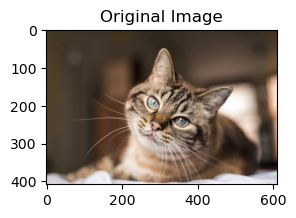

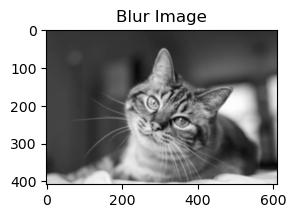

In [33]:
imageData = cv2.imread("../input/cat-image/CatImage.jpg")
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurImage = cv2.GaussianBlur(grayImage, (5,5), 0)
catImageShow("Original Image", image)
catImageShow("Blur Image", blurImage)

# OpenCV Bilateral Filter
**This method of noise removal is highly effective but is slower compared to other filters. The Gaussian filter blurred the edges too and that is not what we want, but this filter makes sure that only those pixels with similar intensities to the central pixel are considered for blurring, thus preserving the edges since pixels at edges will have large intensity variation. In OpenCV we have cv.bilateralFilter() method that can implement this filter.**

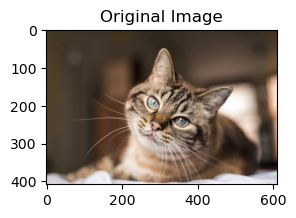

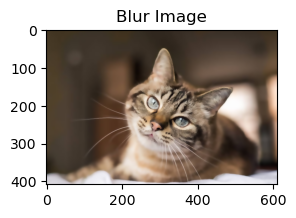

In [49]:
imageData = cv2.imread("../input/cat-image/CatImage.jpg")
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bilateralImage = cv2.bilateralFilter(imageData,9,75,75)
catImageShow("Original Image", image)
catImageShow("Blur Image", bilateralImage)

# Canny Edge Detection Image Blur

Edge detection is an image processing technique used for finding the boundaries of objects within images. 

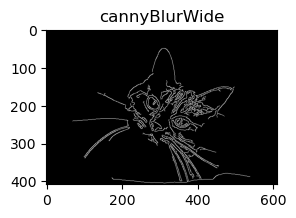

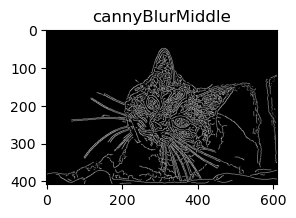

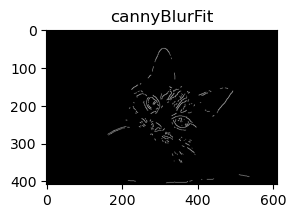

In [36]:
cannyBlurWide = cv2.Canny(blurImage, 20, 250) #Here 20, 250 is threshold value. Threshold value is image edge detection value
cannyBlurMiddle = cv2.Canny(blurImage, 15, 50)
cannyBlurFit = cv2.Canny(blurImage, 240, 255)

catImageShow("cannyBlurWide",cannyBlurWide)
catImageShow("cannyBlurMiddle", cannyBlurMiddle)
catImageShow("cannyBlurFit", cannyBlurFit)